## **Sepsis Prediction API: Developing a machine learning model and API for sepsis prediction and risk assessment.**
## BUSINESS UNDERSTANDING

A machine learning model and API for early detection and risk assessment of sepsis. This project aims to develop a robust predictive model that can accurately identify the onset of sepsis, a life-threatening condition, using clinical data and CRISP-DM framework. 

The model is deployed as an API, allowing healthcare professionals and applications to integrate sepsis prediction capabilities into their workflows seamlessly. By leveraging advanced algorithms and diverse data sources, this API can potentially aid in timely interventions, improving patient outcomes and reducing the mortality rate associated with sepsis

This dataset contains different features information such as:

* ID: number to represent patient ID

* PRG: Plasma glucose

* PL: Blood Work Result-1 (mu U/ml)

* PR: Blood Pressure (mm Hg)

* SK: Blood Work Result-2 (mm)

* TS: Blood Work Result-3 (mu U/ml)

* M11: Body mass index (weight in kg/(height in m)^2

* BD2: Blood Work Result-4 (mu U/ml)

* Age: patients age (years)

* Insurance: If a patient holds a valid insurance card (1 yes , 0 no).

* Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

             HYPOTHESIS

Null Hypothesis (H0):Null Hypothesis (H0): Patients to develop sepsis is independent of their age.

Alternative Hypothesis (H1): Patients to develop sepsis depends on their age .

### QUESTIONS

 
1. Is there a correlation between patient age and of sepsis ?

2. What is the distribution of predicted sepsis cases across different age groups?

3. Are certain age groups more frequently predicted to have sepsis than others?

4. Are there any clinical factors associated with age that significantly influence the model's performance?

5. 

## DATA UNDERSTANDING

### *Importation*


In [121]:
# data handling
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# statistical testing
from scipy.stats import ttest_ind

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,LabelEncoder,FunctionTransformer
from sklearn.feature_selection import SelectKBest,mutual_info_classif

# modeling
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, roc_auc_score,make_scorer,auc

# balancing
from imblearn.over_sampling import RandomOverSampler,SMOTE

# Hyperparameters Fine-tuning 
from sklearn.model_selection import GridSearchCV


#other utili
import joblib


### *EDA*
#### *Data Loading*


In [45]:
#display all rows
pd.set_option("display.max_rows",None)

#load test dataset 
test = pd.DataFrame(pd.read_csv('dataset\Paitients_Files_Test.csv'))
test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0


In [46]:
#load train df_trainset
df_train = pd.DataFrame(pd.read_csv('dataset\Paitients_Files_Train.csv')).head(20)
df_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [47]:
# general infomation
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         20 non-null     object 
 1   PRG        20 non-null     int64  
 2   PL         20 non-null     int64  
 3   PR         20 non-null     int64  
 4   SK         20 non-null     int64  
 5   TS         20 non-null     int64  
 6   M11        20 non-null     float64
 7   BD2        20 non-null     float64
 8   Age        20 non-null     int64  
 9   Insurance  20 non-null     int64  
 10  Sepssis    20 non-null     object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.8+ KB


In [48]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
PRG,20.0,4.50000,3.561490,0.000,1.0000,4.5000,7.250,10.000
PL,20.0,129.40000,35.354446,78.000,106.0000,117.0000,152.500,197.000
PR,20.0,61.70000,26.159631,0.000,57.5000,70.0000,74.000,96.000
SK,20.0,17.80000,17.733703,0.000,0.0000,21.0000,32.750,47.000
TS,20.0,116.15000,215.843821,0.000,0.0000,0.0000,114.000,846.000
M11,20.0,30.95000,9.654424,0.000,26.9750,30.3000,35.875,45.800
BD2,20.0,0.51165,0.513691,0.134,0.1985,0.3745,0.560,2.288
Age,20.0,37.45000,11.591626,21.000,30.7500,32.0000,50.250,59.000
Insurance,20.0,0.75000,0.444262,0.000,0.7500,1.0000,1.000,1.000


📢 The sum of the mean, mode, and median (50th percentile) typically characterizes a normal distribution. However, upon examining the data, it appears that there is right skewness, evident when the mean exceeds the median. Furthermore, the scaling across features varies, with one particular feature, PL, having a significantly larger scale of 78.00. This discrepancy in scales could potentially impact our model, as it might overly prioritize the PL feature due to its larger range.The log(1+x) transformation can handle this data with zero values.It can be effective in reducing positive skewness

In [49]:
# check duplicates
print(
f'This dataset has',
df_train.duplicated().sum(),
'duplicates'
)

This dataset has 0 duplicates


In [50]:
#check null 
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

📢 this data has no Null values 

### *Univariate Analysis*

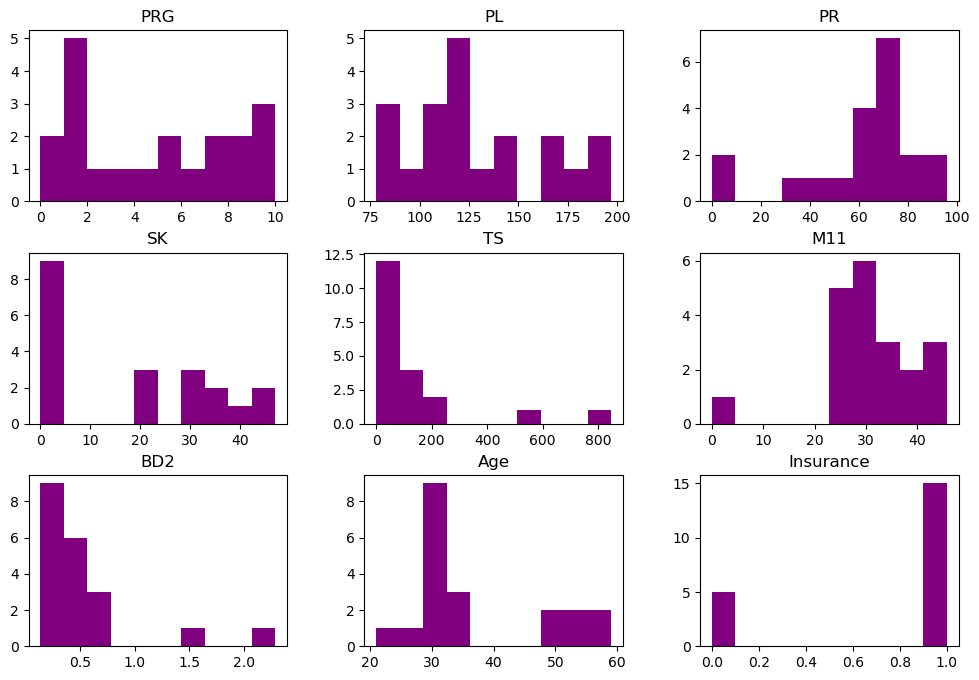

In [51]:
# continuous ditribution 
df_train.hist(figsize=(12,8),grid=False,color ="purple")
#plt.title("The distribution of features")
plt.show()

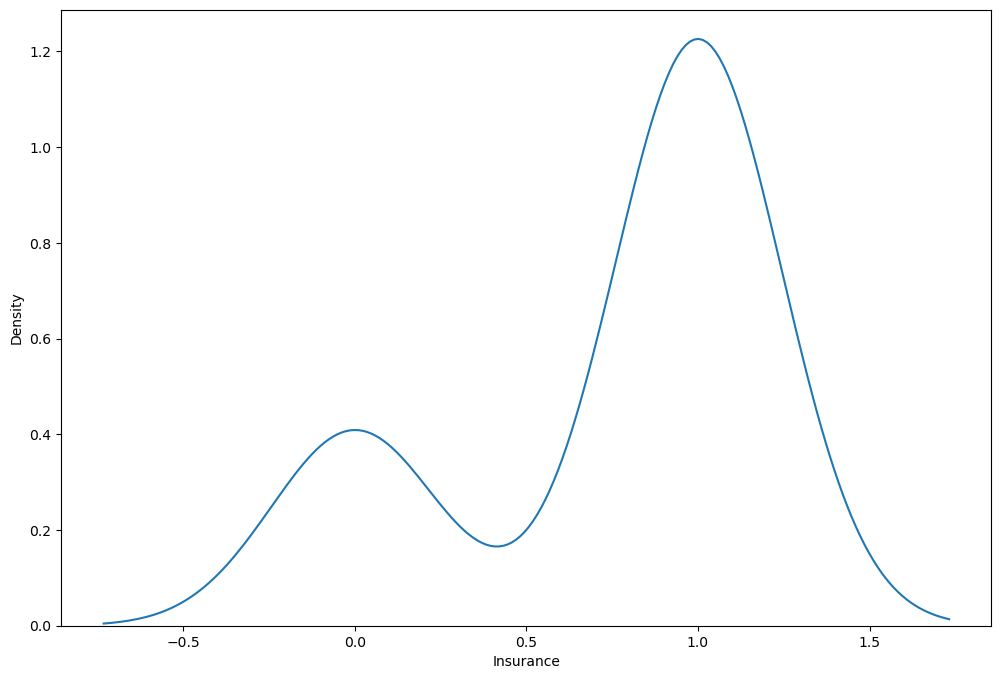

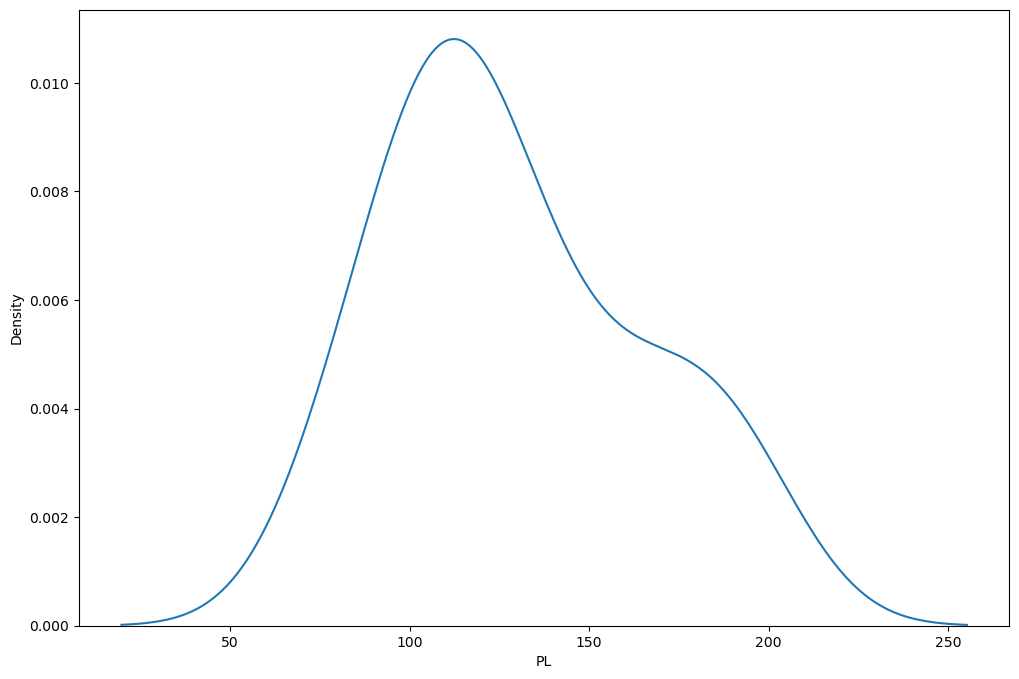

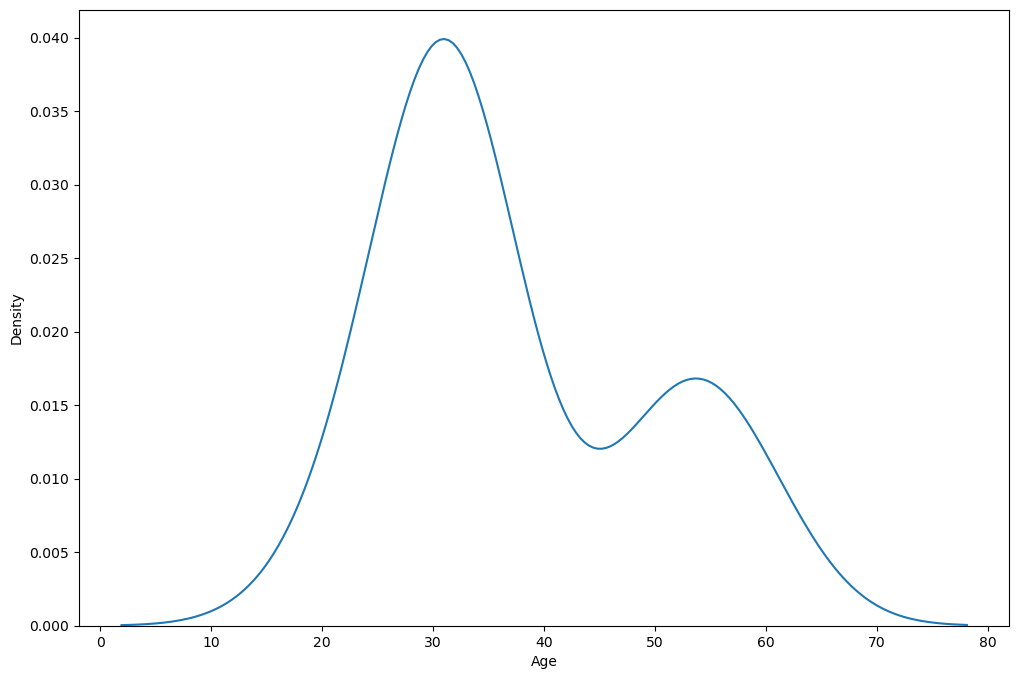

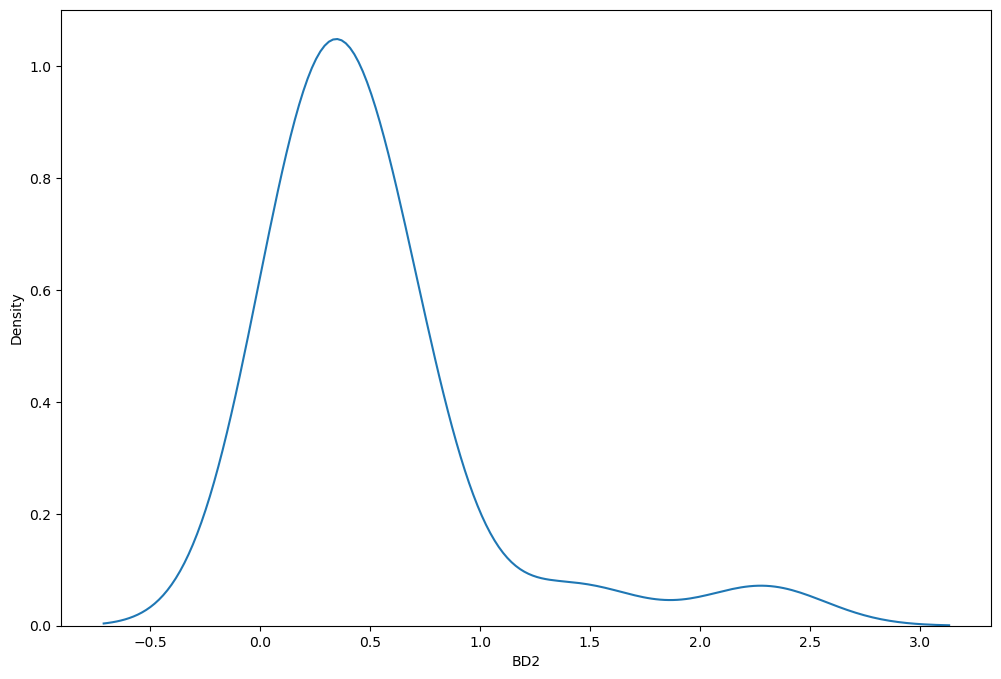

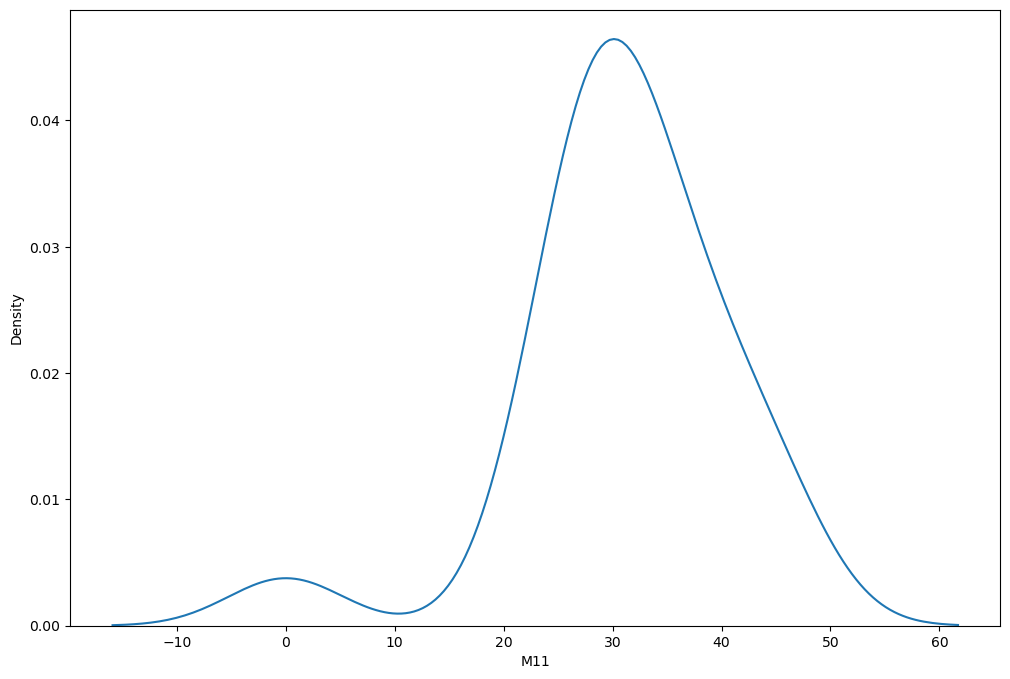

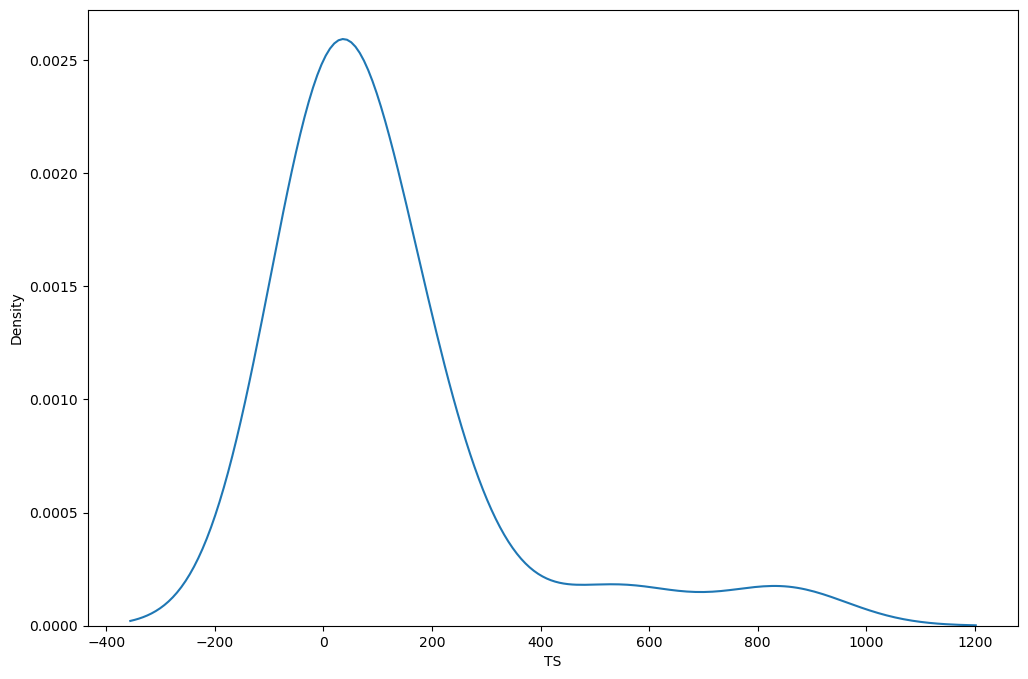

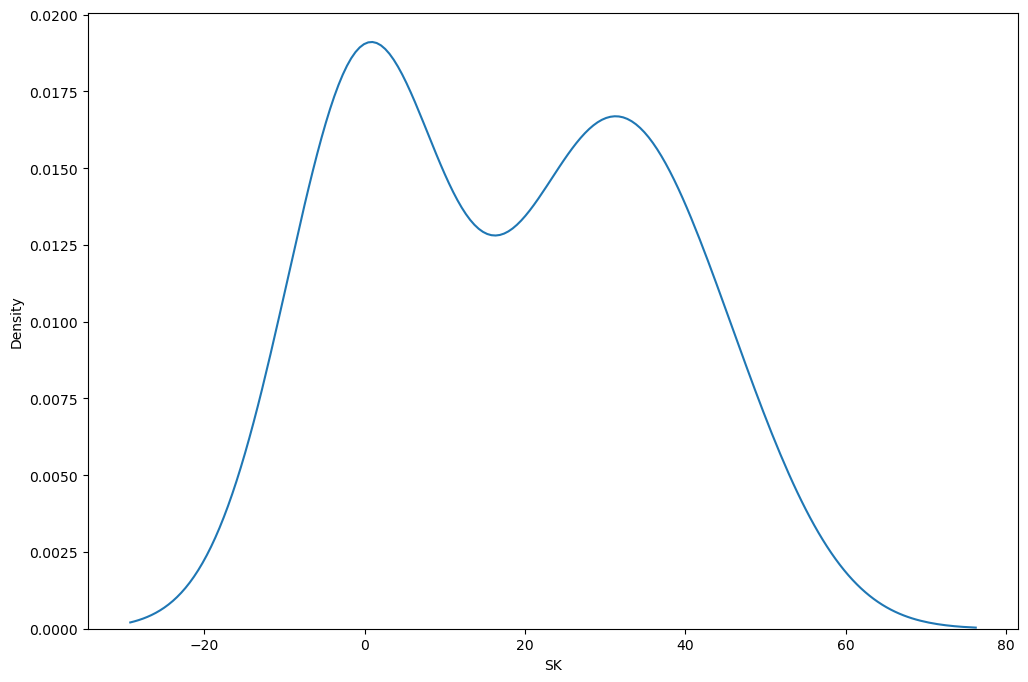

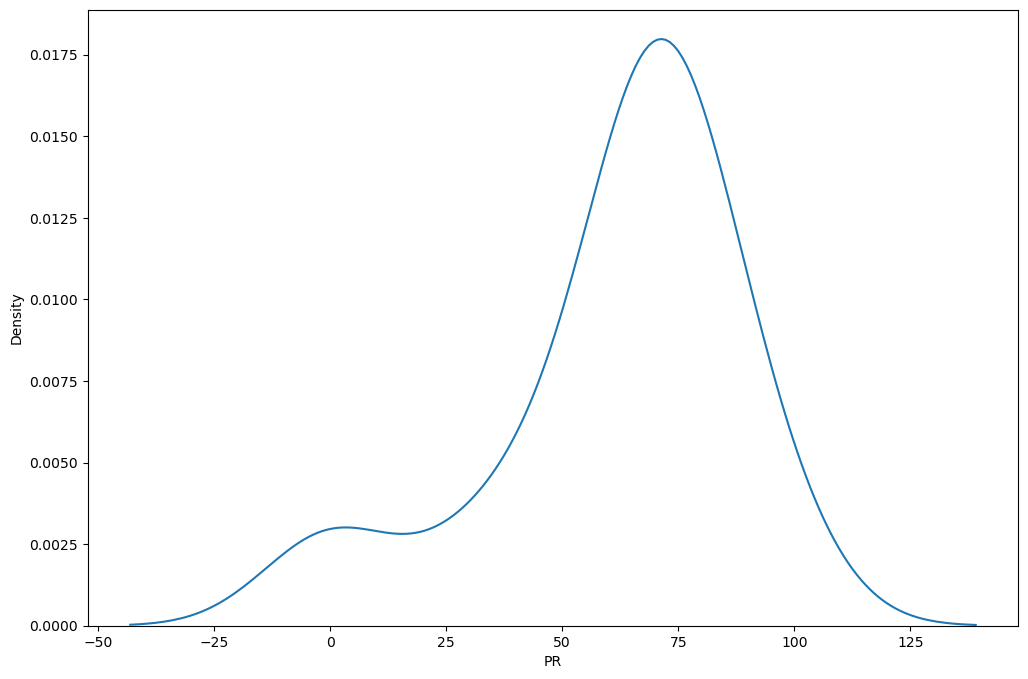

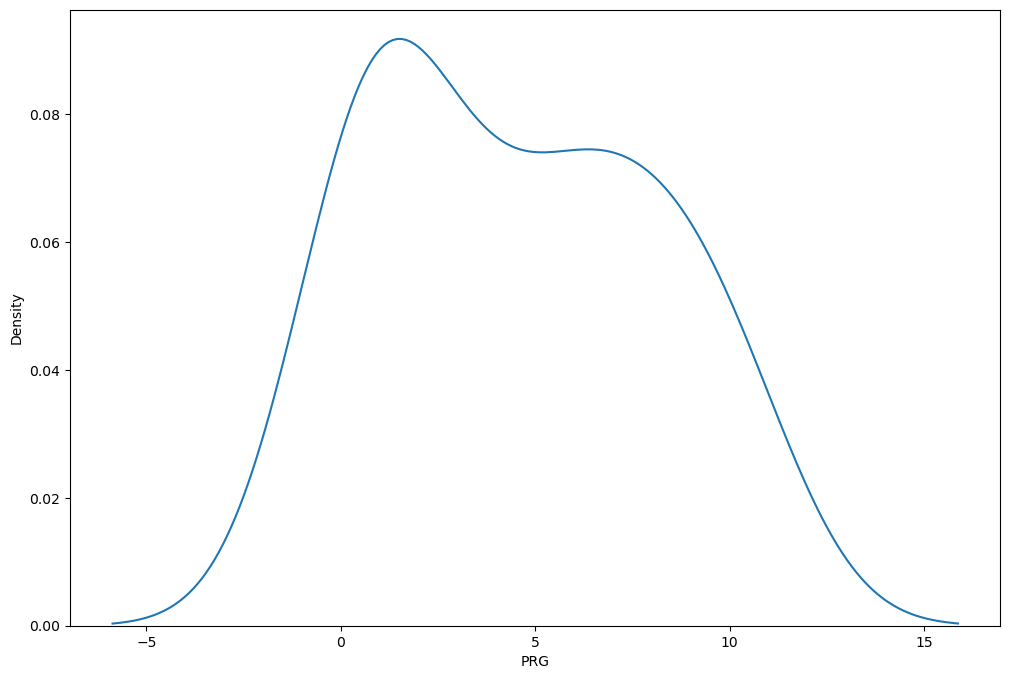

In [52]:

# continuous ditribution 
plt.figure(figsize=(12,8))
sns.kdeplot(df_train["Insurance"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["PL"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["Age"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["BD2"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["M11"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["TS"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["SK"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["PR"])
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df_train["PRG"])
plt.show()

📢 Upon observing these histograms and KDE visualizations of the continuous columns, it is evident that most of them exhibit positive skewness. Transformation of these columns will be necessary to achieve better balance and enhance the predictive performance of the model.

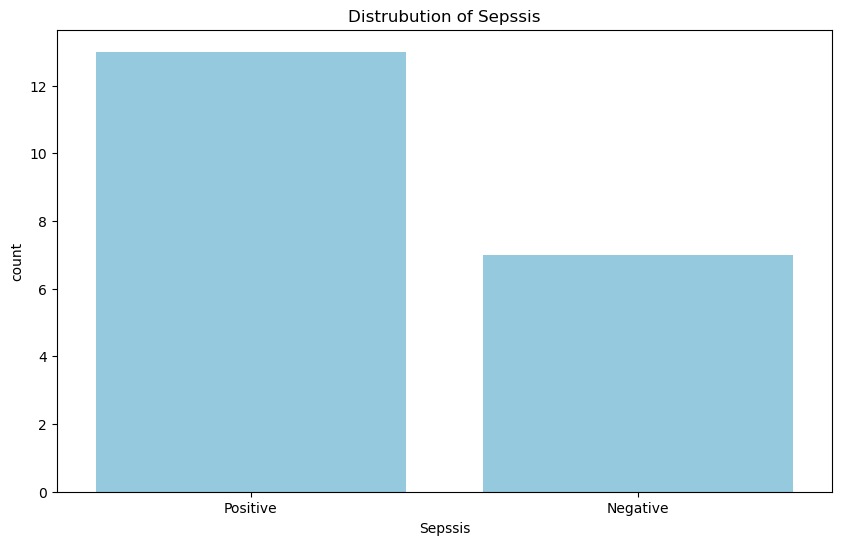

In [53]:
#categorical distribution 
plt.figure(figsize=(10,6))
sns.countplot(data= df_train,x="Sepssis",color = "skyblue")
plt.title("Distrubution of Sepssis")
plt.show()


📢 The countplot displayed above, employed to visualize the distribution of a categorical feature, indicates a prevailing negative skewness. This imbalance in our primary features could potentially diminish the quality and predictive accuracy of our model, underscoring the importance of achieving balance to optimize model performance.

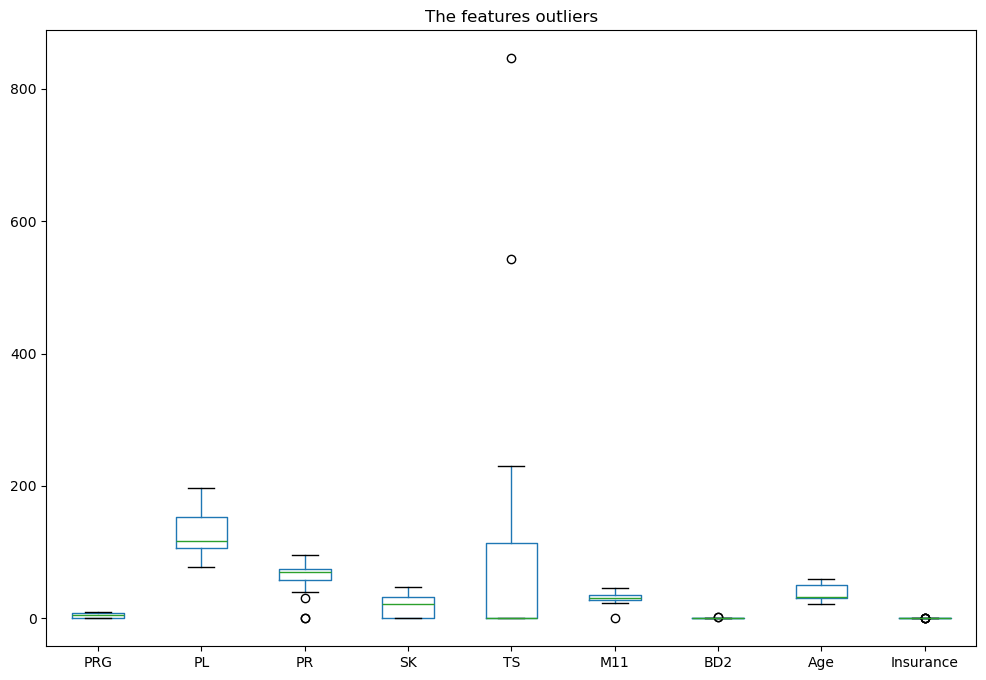

In [54]:
#outliers
df_train.boxplot(figsize=(12,8),grid=False,showfliers=True )
plt.title("The features outliers")
plt.show()

### *Bi-variate Analysis*

In [55]:
#corr
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.181410,-0.058186,-0.806660,-0.486759,-0.386041,-0.039599,0.182946,-0.049896
PL,0.181410,1.000000,0.219686,0.016168,0.553790,-0.072565,0.209934,0.667874,0.194353
PR,-0.058186,0.219686,1.000000,0.008259,0.036305,-0.314031,-0.041423,0.308379,-0.206057
SK,-0.806660,0.016168,0.008259,1.000000,0.461601,0.450973,0.103832,0.043219,-0.046763
TS,-0.486759,0.553790,0.036305,0.461601,1.000000,0.118807,-0.023130,0.491582,0.270455
M11,-0.386041,-0.072565,-0.314031,0.450973,0.118807,1.000000,0.236690,-0.383225,-0.147866
BD2,-0.039599,0.209934,-0.041423,0.103832,-0.023130,0.236690,1.000000,0.174482,0.139355
Age,0.182946,0.667874,0.308379,0.043219,0.491582,-0.383225,0.174482,1.000000,0.166080
Insurance,-0.049896,0.194353,-0.206057,-0.046763,0.270455,-0.147866,0.139355,0.166080,1.000000


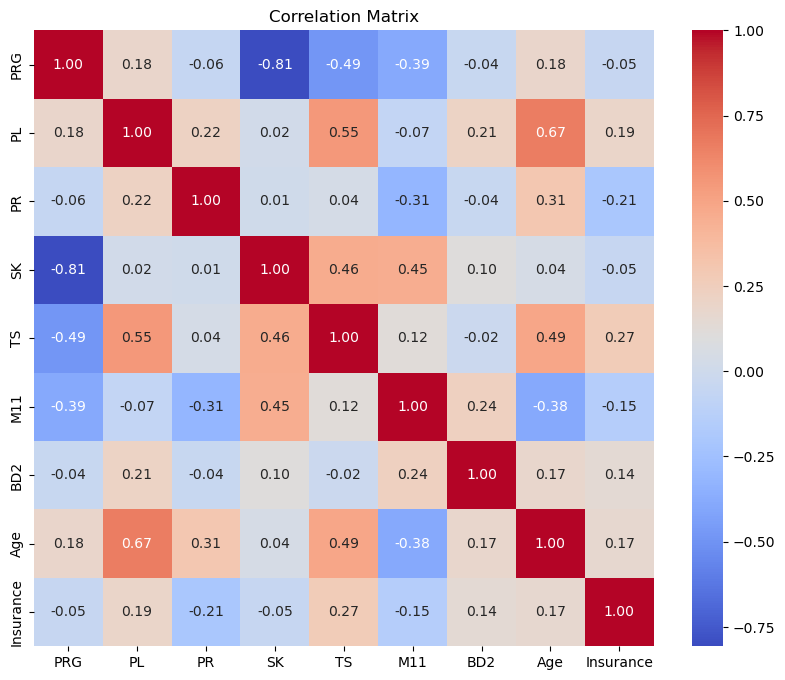

In [56]:
# visualize corr heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title('Correlation Matrix')

plt.show()

📢 In the presented heatmap, we can examine the correlation matrix of continuous features. Notably, the 'PRG' column shows a moderate correlation with both 'SK', while the 'Age' column demonstrates a moderate correlation with the 'PL' column. This observation can be utilized for further analysis and feature engineering, especially when exploring and enhancing relationships among the mentioned columns.









In [57]:
grouped_df = df_train.groupby(['Age', 'Sepssis']).size().unstack(fill_value=0)
grouped_df

Sepssis,Negative,Positive
Age,,
21,1,0
26,0,1
29,1,0
30,2,0
31,1,2
32,0,3
33,1,1
34,0,1
50,0,1


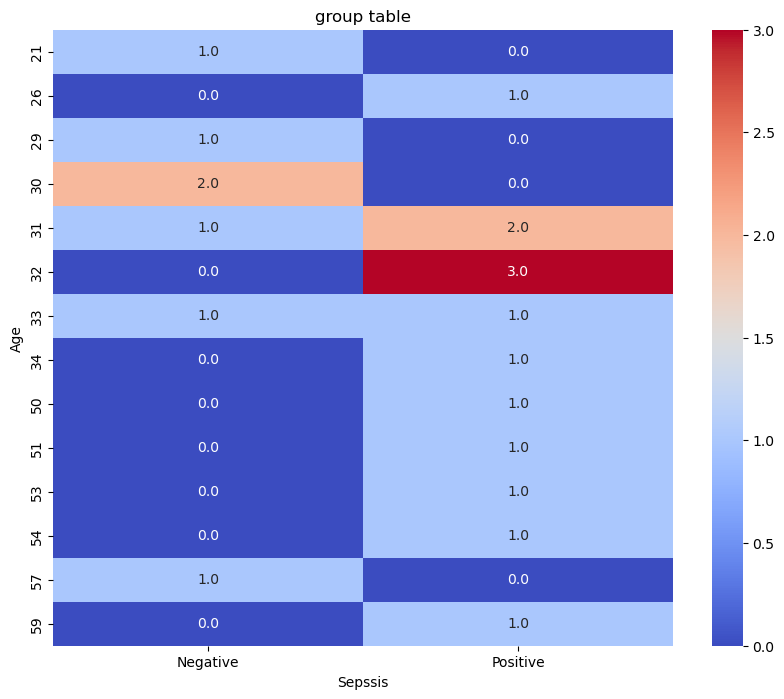

In [58]:
# visualize heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    grouped_df,
    annot=True,
    cmap='coolwarm',
    fmt=".1f"
)

plt.title('group table')

plt.show()


📢 Using a heatmap, we visualized the distribution of the 'Age' variable across rows and its correlation with the 'Sepsis' variable. Notably, we observed a positive correlation between the '30s' age group at 32 years and 'Positive' Sepsis. Furthermore, this same age group at both 31 and 32 years demonstrates a moderate correlation with both 'Negative' and 'Positive' Sepsis. This finding offers valuable insights that can be utilized to assess and validate our initial hypothesis.

### *Multivariate Analysis*

<Figure size 1000x800 with 0 Axes>

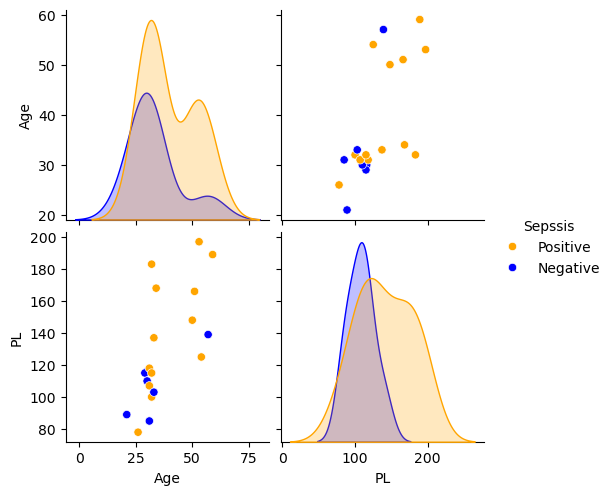

In [59]:
data = df_train[["Age","PL",'Sepssis']]
plt.figure(figsize=(10, 8))
sns.pairplot(data,palette={'Positive':'orange','Negative':'blue'}, hue = 'Sepssis')
plt.show()

### *Answer Questions*

1. Is there a correlation between patient age and of sepsis?

In [60]:

#contingency_table = pd.crosstab(index=df_train['Age'], columns=df_train['Sepssis'])
contingency_table = df_train.groupby(['Age', 'Sepssis']).size().reset_index(name='Count')


fig = px.scatter(
    contingency_table, 
    x= 'Age', 
    y='Count',
    trendline="ols", 
    title='Scatter plot Age vs Predicted Sepsis'
)


fig.update_layout(
    xaxis_title='Patient Age',
    yaxis_title='Predicted Sepsis',
    legend_title='Trend Line',
    showlegend=True
)

fig.show()


2. What is the distribution of predicted sepsis cases across different age ?


In [61]:
#plot
fig = px.bar(
    df_train,
    x='Age', 
    y='Sepssis', 
    color='Sepssis', 
    orientation='h', 
    title='Distribution of Predicted Sepsis Cases Across Age',
    labels={'Age': 'Age', 'Sepssis': 'Predicted Sepsis', 'color': 'Predicted Sepsis'}
)


fig.update_layout(
    xaxis_title='Age ',
    yaxis_title='Number of Cases',
    barmode='stack',
    legend_title='Predicted Sepsis',
    showlegend=True
)


fig.show()

3. Are certain age more frequently predicted to have sepsis than others?

In [62]:
# group
group_df = df_train.groupby(['Age', 'Sepssis']).size().reset_index(name='Count')

#plot
fig = px.bar(
    group_df, 
    x='Age', 
    y='Count', 
    color='Sepssis', 
    barmode='group',
    title='Proportion of Predicted Sepsis Cases Across Different Age',
    labels={'Age': 'Age', 'Count': 'Number of Cases', 'Sepssis': 'Predicted Sepsis'}
)


fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of Cases',
    legend_title=' Sepsis',
    showlegend=True
)

fig.show()


4. Are there any clinical factors associated with age that significantly influence the model's performance?

In [63]:
#corr
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix
# plot
fig = px.imshow(
    corr_matrix,
    labels=dict(x="Clinical Factors", y="Clinical Factors", cmap="coolwarm"),
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    title='Correlations Between Age and Various Clinical Factors'
)
 #annotation
annotations = []
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=j, y=i, text=str(round(value, 2)),
                                font=dict(color='white' if abs(value) > 0.5 else 'black'),
                                showarrow=False))
fig.update_layout(annotations=annotations)


fig.update_layout(
    xaxis_title='Clinical Factors',
    yaxis_title='Clinical Factors'
)

fig.show()

## HYPOTHESIS TEST

### *T-test*

In [64]:
# group patients into two groups 
sepsis_group = df_train[df_train['Sepssis'] == 'Positive']['Age']
no_sepsis_group = df_train[df_train['Sepssis'] == 'Negative']['Age']

# Testing
t_stats , p_value = ttest_ind(sepsis_group,no_sepsis_group)
print("p-value:",p_value)
print("t_stats:",t_stats)
if (p_value<0.01):
    print('Reject null hypothesis: Patients to develop sepsis depends on their age.')
else:
    print('We do not have enough evidence to reject the null hypothesis.')

p-value: 0.2164932106725072
t_stats: 1.280882321411525
We do not have enough evidence to reject the null hypothesis.


📢 There is sufficient evidence to reject the null hypothesis, indicating that the assertion "Patients to develop sepsis depends on their age" is not supported. Instead, the alternative hypothesis, suggesting that there is no significant relationship between Patients to develop sepsis and of their age(independent)., is favored.

## DATA PREPARATION

### *Divide data into input and output*

In [65]:
#balance check
df_train["Sepssis"].value_counts().rename("value count").reset_index()

,Sepssis,value count
0,Positive,13
1,Negative,7


In [66]:
#create input (X) and lable (Y)
X = df_train.drop(["ID","Insurance","Sepssis"],axis=1)

Y = df_train["Sepssis"]

In [67]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [68]:
Y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

In [69]:
#Split the data into training and testing sets
X_train, X_eval,Y_train,Y_eval = train_test_split(X,Y, test_size=0.20, random_state=42,stratify = Y )

print("Training set shape:",X_train.shape,"Evaluating Set Shape",X_eval.shape)

Training set shape: (16, 8) Evaluating Set Shape (4, 8)


### *Pipeline*

In [70]:
#col
col = X.columns
col

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

In [71]:
# Feature pipeline
data_pipeline = Pipeline(steps=[
    ("log_transformer", FunctionTransformer(np.log1p)),
    ("simple_imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("feature_selection", SelectKBest(mutual_info_classif,k="all")),
])


# End-to-end feature preprocessor
preprocessor = ColumnTransformer([
    ("data_preprocessor", data_pipeline, col),
])

### *Encode target*

In [96]:
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_eval_encoded = le.transform(Y_eval)

## MODELLING & EVALUATION

### *imbalanced data*

In [97]:
models= [
    ("rf_classifier",RandomForestClassifier(random_state=42)),
    ("lgbm_classifier", LGBMClassifier(random_state=42,verbosity=-1,verbose_eval=False)),
    ("logistic_classifier", LogisticRegression(random_state=42)),
]

# empty dictionary 
models_imbalanced_pipelines = {}

# Loop through the models
for classifier_name, classifier in models:
    
    models_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier),
    ])

    # Train 
    models_pipeline.fit(X_train, Y_train_encoded)
    
    # Store pipeline in the dictionary
    models_imbalanced_pipelines[classifier_name] = models_pipeline

# Predict 
for classifier_name, models_pipeline in models_imbalanced_pipelines.items():
    Y_pred = models_pipeline.predict(X_eval)

    
    # classification report metrics 
    model_report = classification_report(Y_eval_encoded, Y_pred, target_names=['Negative', 'Positive'])
    
     
    print(f"Classification Report for {classifier_name}:\n{model_report}")
    print('='*50)

Classification Report for rf_classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Classification Report for lgbm_classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Classification Report for logistic_classifier:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.75      1.00      0.86         3

    accuracy                           0.75        

📢 based on the classification report of imbalanced dataset the models are leaning towards the majority class with  a high precision and recall values. However, the F1-score is low which indicates that the model may be biased toward predicting the majority class rather than trying to balance between classes. We can use ROC  curve analysis to understand how well our model performs across all thresholds of probability scores and it is insensitive to class imbalance.



### *ROC & AUC*

In [98]:
#area under curve
roc_curves = {}
auc_scores = {}

for classifier_name, models_pipeline in models_imbalanced_pipelines.items():
    Y_pred_proba = models_pipeline.predict_proba(X_eval)[:, 1] 
    fpr, tpr, _ = roc_curve(Y_eval_encoded, Y_pred_proba)
    roc_curves[classifier_name] = (fpr, tpr)
    auc_scores[classifier_name] = roc_auc_score(Y_eval_encoded, Y_pred_proba)

print("AUC Scores:")
for classifier_name, auc in auc_scores.items():
    print(f"{classifier_name}: {auc:.4f}")


AUC Scores:
rf_classifier: 1.0000
lgbm_classifier: 0.5000
logistic_classifier: 0.6667


📢 Random Forest classifier can perfectly distinguish between the positive and negative classes in the dataset. LightGBM classifier on the other hand is performing very poorly, no better than a random guess.The Logistic Regression classifier has some predictive power, but its performance is relatively low compared to the Random Forest classifier.

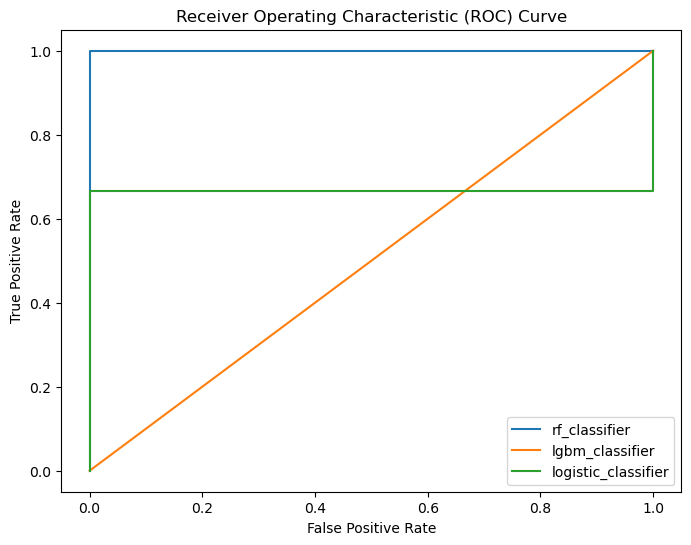

In [75]:
plt.subplots(figsize=(8, 6))
for classifier_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=classifier_name)


#plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()

### *balanced data*

In [99]:
# RandomOverSampler
sampler = RandomOverSampler(random_state=42)
X_train_random, Y_train_random = sampler.fit_resample(X_train ,Y_train_encoded)
print("Random over-sampling:")
print("Number of samples in the oversampled training data:",len(Y_train_random))
print("Number of features in the oversampled training data:",len(X_train_random))

Random over-sampling:
Number of samples in the oversampled training data: 20
Number of features in the oversampled training data: 20


In [100]:
pd.DataFrame(Y_train_random).value_counts()

0    10
1    10
Name: count, dtype: int64

In [101]:
models= [
    ("rf_classifier",RandomForestClassifier(random_state=42)),
    ("lgbm_classifier", LGBMClassifier(random_state=42,verbosity=-1,verbose_eval=False)),
    ("logistic_classifier", LogisticRegression(random_state=42)),
]

# empty dictionary 
models_balanced_pipelines = {}

# Loop through the models
for classifier_names, classifiers in models:
    
    models_pipelines = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifiers", classifiers),
    ])

    # Train 
    models_pipelines.fit(X_train_random, Y_train_random)
    
    # Store pipeline in the dictionary
    models_balanced_pipelines[classifier_names] = models_pipelines

# Predict 
for classifier_names, models_pipelines in models_balanced_pipelines.items():
    Y_pred = models_pipelines.predict(X_eval)

    
    # classification report metrics 
    models_report = classification_report(Y_eval_encoded, Y_pred)
    
     
    print(f"Classification Report for {classifier_names}:\n{models_report}")
    print('='*50)

Classification Report for rf_classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Classification Report for lgbm_classifier:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

Classification Report for logistic_classifier:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75        

In [102]:
# visualize model performance


models_balanced = [
    ("rf_classifier",RandomForestClassifier(random_state=42)),
    ("lgbm_classifier", LGBMClassifier(random_state=42,verbosity=-1,verbose_eval=False)),
    ("logistic_classifier", LogisticRegression(random_state=42)),
]

# an empty dictionaries 
models_balanced_pipelines = {}
predictions = {}


for classifier_name, classifier in models_balanced:
   
    models_balanced_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier),
    ])

    # Train
    models_balanced_pipeline.fit(X_train_random, Y_train_random)

    # Store pipeline in the dictionary
    models_balanced_pipelines[classifier_name] = models_balanced_pipeline

    
    Y_pred = models_balanced_pipeline.predict(X_eval)
    
    # Store predictions
    predictions[classifier_name] = Y_pred

# matrix for each classifier
for classifier_name, Y_pred in predictions.items():
    matrix = confusion_matrix(Y_eval_encoded, Y_pred)
    matrix = pd.DataFrame(matrix).reset_index(drop=True)
    print(f"Confusion matrix for {classifier_name}:\n{matrix}")


Confusion matrix for rf_classifier:
   0  1
0  0  1
1  0  3
Confusion matrix for lgbm_classifier:
   0  1
0  1  0
1  3  0
Confusion matrix for logistic_classifier:
   0  1
0  1  0
1  1  2


📢 based on the classification report of balanced dataset the best  model is Logistic Regression with a balanced accuracy score of 0.75 and f1-score of 0.80 which was not that best in imbalanced dataset. The recall of 0.67 for the "Positive" class  is quite low, missing around 33% of the true positive cases, which can be critical in our scenario like sepsis prediction, where false negatives can have severe consequences.Will consider thresholding to optimize the model's performance based on prioritizing recall to minimize false negatives, even at the cost of lower precision

### *Threshold*

**LogisticRegression** 

In [115]:
# Compute thresholds 
fpr, tpr, thresholds = roc_curve(Y_eval_encoded, Y_pred_proba)

roc_auc = auc()
#roc_auc = roc_auc_score(Y_eval_encoded, Y_pred_proba)

# to view all max row
pd.set_option('display.max_rows',None) 

table = pd.DataFrame(zip(fpr, tpr, thresholds), columns=['False Positive','True Positive','thresholds'])
table.head()

,False Positive,True Positive,thresholds
0,0.0,0.000000,inf
1,0.0,0.333333,0.885873
2,0.0,1.000000,0.490283
3,1.0,1.000000,0.477656


In [116]:

#  logistic pipeline
logistic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logistic_classifier", LogisticRegression(random_state=42)),
])

logistic_pipeline = logistic_pipeline.fit(X_train_random, Y_train_random)

# threshold 
threshold = 0.490283

# predicted probabilities 
Y_pred_proba = logistic_pipeline.predict_proba(X_eval,)[:, 1]

# predictions based on the chosen threshold
Y_pred_threshold = (Y_pred_proba >= threshold).astype(int)

# D classification report
classification_rep = classification_report(Y_eval_encoded, Y_pred_threshold)
print("Threshold Logistic Classification Report:")
print(classification_rep)

#  confusion matrix
conf_matrix = confusion_matrix(Y_eval_encoded, Y_pred_threshold)
print("Threshold Logistic Confusion Matrix:")
print(conf_matrix)

Threshold Logistic Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Threshold Logistic Confusion Matrix:
[[1 0]
 [0 3]]


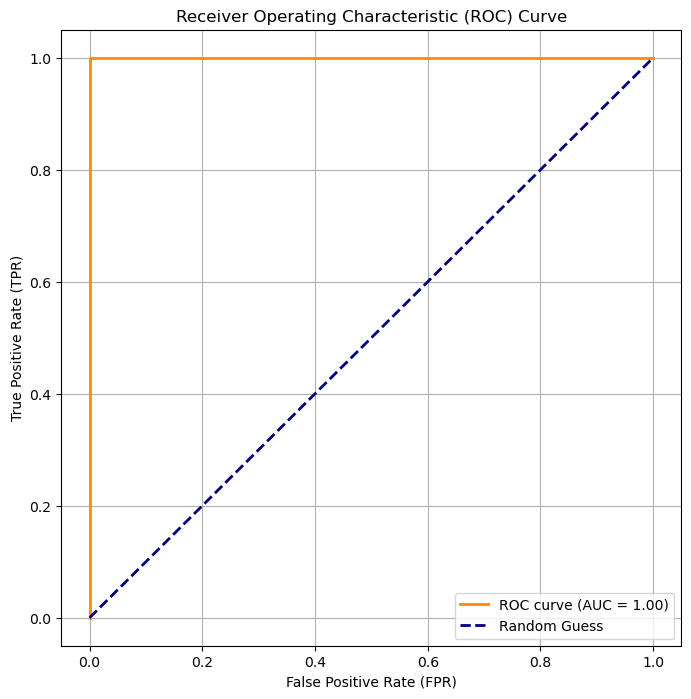

In [110]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')


#  labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### *Hyperparameter Tuning*

**LogisticRegression**

In [123]:
logistic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logistic_classifier", LogisticRegression(random_state=42)),
])

# parameter grid 
param_grid = {
    "logistic_classifier__penalty": ["l1", "l2"],
    "logistic_classifier__C": [0.01, 0.1, 1, 10, 100],
    "logistic_classifier__solver": ["liblinear", "saga"],
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

grid_search.fit(X_train_random, Y_train_random)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'logistic_classifier__C': 0.1, 'logistic_classifier__penalty': 'l2', 'logistic_classifier__solver': 'liblinear'}
Best ROC AUC score: 0.65


In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

In [125]:
# Get the best par from the grid search
best_estimator_ = grid_search.best_estimator_


#logistic_pipeline.set_estimator(**best_estimator_)

logistic_pipeline = logistic_pipeline.fit(X_train_random, Y_train_random)

# Get predicted 
Y_pred = logistic_pipeline.predict(X_eval)



#  classification report
classification_rep = classification_report(Y_eval_encoded, Y_pred)
print("Hypertuned LogisticClassification Report:")
print(classification_rep)

#  confusion matrix
conf_matrix = confusion_matrix(Y_eval_encoded, Y_pred)
print("Hypertuned Logistic Confusion Matrix:")
print(conf_matrix)

Hypertuned LogisticClassification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Hypertuned Logistic Confusion Matrix:
[[1 0]
 [1 2]]


### *Documentation of model*

## MODEL PERSISTENCE